In [43]:
import fastf1 as ff1
#from fastf1 import plotting
#from matplotlib.pyplot import figure 
from matplotlib import pyplot as plt 
#from matplotlib.collections import LineCollection
#from matplotlib import cm
import pandas as pd
import numpy as np
import random 
import requests
import seaborn as sns

In [44]:
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [45]:
rounds = 22 #we had 21 races but I'll do 22 for the range

all_championship_standings = pd.DataFrame()

driver_team_mapping = {}

for i in range(1, rounds):
    race = ergast_retrieve(f'current/{i}/driverStandings')
    
    standings = race['StandingsTable']['StandingsLists'][0]['DriverStandings']
    
    current_round = {'round': i}
    
    for i in range (len(standings)):
        driver = standings[i]['Driver']['code']
        position = standings[i]['position']
        
        current_round[driver]= int(position)
        
        driver_team_mapping[driver] = standings[i]['Constructors'][0]['name']
        
    all_championship_standings = all_championship_standings.append(current_round, ignore_index =True)
    
    
all_championship_standings = all_championship_standings.set_index('round')
        
        

In [46]:
#melting of the data
all_championship_standings_melted = pd.melt(all_championship_standings.reset_index(), ['round'])
all_championship_standings_melted.head(150)

,round,variable,value
0,1.0,HAM,1.0
1,2.0,HAM,1.0
2,3.0,HAM,1.0
3,4.0,HAM,1.0
4,5.0,HAM,2.0
...,...,...,...
145,20.0,RIC,8.0
146,21.0,RIC,8.0
147,1.0,SAI,8.0
148,2.0,SAI,6.0


NameError: name 'team_color' is not defined

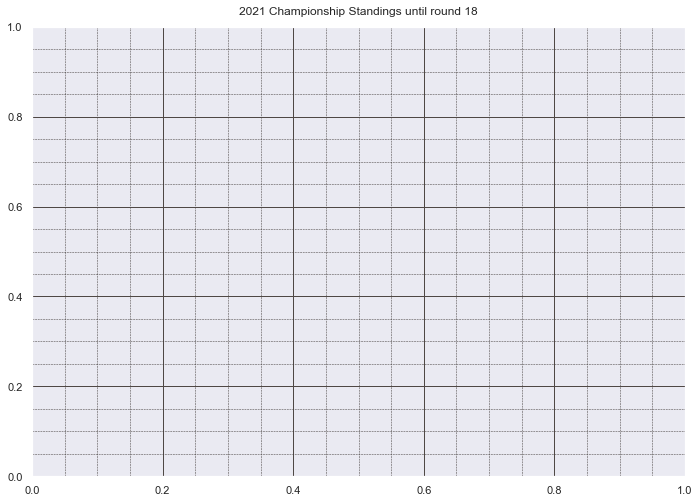

In [47]:

# Increase the size of the plot 
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Initiate the plot
fig, ax = plt.subplots()

# Set the title of the plot
ax.set_title("2021 Championship Standings until round 18")

# Draw a line for every driver in the data by looping through all the standings
# The reason we do it this way is so that we can specify the team color per driver
for driver in pd.unique(all_championship_standings_melted['variable']):
    sns.lineplot(
        x='round', 
        y='value', 
        data=all_championship_standings_melted.loc[all_championship_standings_melted['variable']==driver], 
        color= team_color(driver_team_mapping[driver])
    )

# Invert Y-axis to have championship leader (#1) on top
ax.invert_yaxis()

# Set the values that appear on the x- and y-axes
ax.set_xticks(range(1, rounds))
ax.set_yticks(range(1, 22))

# Set the labels of the axes
ax.set_xlabel("Round")
ax.set_ylabel("Championship position")

# Disable the gridlines 
ax.grid(False)


# Add the driver name to the lines
for line, name in zip(ax.lines, all_championship_standings.columns.tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
        
    text = ax.annotate(
        name,
        xy=(x + 0.1, y),
        xytext=(0, 0),
        color=line.get_color(),
        xycoords=(
            ax.get_xaxis_transform(),
            ax.get_yaxis_transform()
        ),
        textcoords="offset points"
    )

# Save the plot
plt.savefig('img/championship_standings.png')